In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## <center><font color=skyblue>1) Présentation du jeu de données</font></center>

In [3]:
# Chargement des données et affichage des 3 premières lignes
trees_df = pd.read_csv(".\data\p2-arbres-fr.csv", delimiter=";")
trees_df.head(3)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061


In [4]:
print(trees_df["stade_developpement"].unique())

def rename_cells(cell):
    stade = cell["stade_developpement"]
    if stade == "A":
        return "Adulte"
    elif stade == "M":
        return "Mature"
    elif stade == 'J':
        return "Jeune"
    elif stade == "JA":
        return "Jeune Adulte"
    else:
        return "Non Spécifié"

trees_df["stade_developpement"] = trees_df.apply(rename_cells, axis=1)
trees_df.head(3)

[nan 'A' 'J' 'M' 'JA']


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,Non Spécifié,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,Adulte,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,Adulte,NaN,48.857705,2.321061


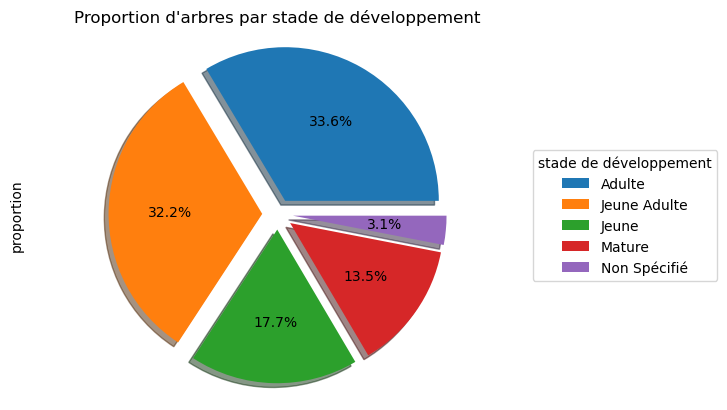

In [5]:
def plot_pie_chart(data, column_info):
    """
    Plot a pie chart for the given column in the DataFrame.

    Parameters:
        data (DataFrame): Input DataFrame containing the data.
        column_info (dict): Dictionary containing column information.
            Keys:
                'name' (str): Name of the column to plot.
                'label' (str): Label of the column.
                'categories' (list): List of categories for the legend.
    """
    sns.set_palette("tab10")
    column_name = column_info['name']
    column_label = column_info['label']
    categories = column_info['categories']
    subset = data[column_name].value_counts(normalize=True)
    subset = subset[subset.index.isin(categories)]
    #plot the pie chart
    subset.plot.pie(autopct='%1.1f%%', shadow=True, labeldistance=None, explode=[0.1]*len(subset))
    plt.title("Proportion d'arbres par " + column_label)
    plt.axis('equal')
    plt.legend(title=column_label, labels=categories, bbox_to_anchor=(1, 0.5), loc='center left')
    plt.show()

column_info = {
    'name': "stade_developpement",
    'label': "stade de développement",
    'categories': ["Adulte", "Jeune Adulte", "Jeune", "Mature", "Non Spécifié"]
}

plot_pie_chart(trees_df, column_info)

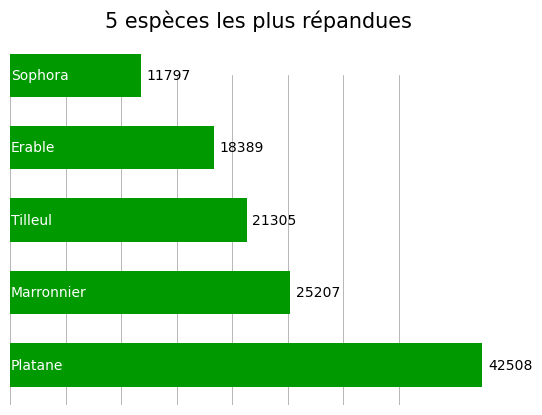

In [6]:
#Les espèces présentes


def plot_top_species_barh(data, top_k=5, title_font_size=15):
    top_species = data['libelle_francais'].value_counts().nlargest(top_k)
    
    for x in range(0, 35001, 5000):    
        plt.plot([x] * (top_k + 1), range(-1, top_k), "-", lw=0.5, color="black", alpha=0.4, zorder=0)
    
    top_species.plot(kind='barh', color="#009900", legend=False, width=0.6)

    plt.title(f"{top_k} espèces les plus répandues", fontsize=title_font_size)

    for i, (species, count) in enumerate(zip(top_species.index, top_species)):
        plt.text(s=species, x=100, y=i, color="white", verticalalignment="center")
        plt.text(s=str(count), x=count + 500, y=i, color="black", verticalalignment="center", horizontalalignment="left")

    plt.axis("off")
    plt.show()

plot_top_species_barh(trees_df)

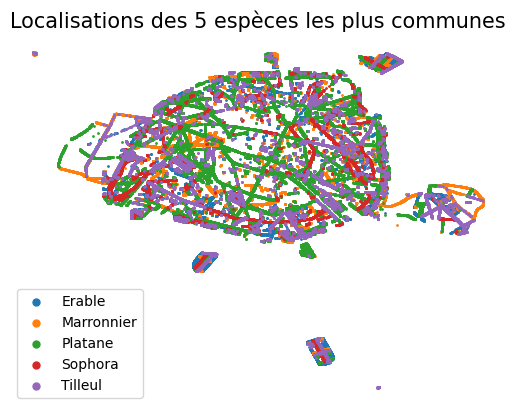

In [7]:
#Emplacement geographique des arbres

def plot_species_locations(df, top_k=5):
    df_top_species = df['libelle_francais'].value_counts().nlargest(top_k)
    species_names = df_top_species.index
    filtered_df = df[df['libelle_francais'].isin(species_names)]
    groups = filtered_df.groupby('libelle_francais')
    for name, group in groups:
        plt.scatter(group.geo_point_2d_b, group.geo_point_2d_a, label=name, s=1)
    plt.title(("Localisations des " + str(top_k) + " espèces les plus communes"), fontsize=15)
    plt.legend(loc = 'lower left', markerscale=5 )
    plt.axis('off')
    plt.show()


plot_species_locations(trees_df, top_k=5)

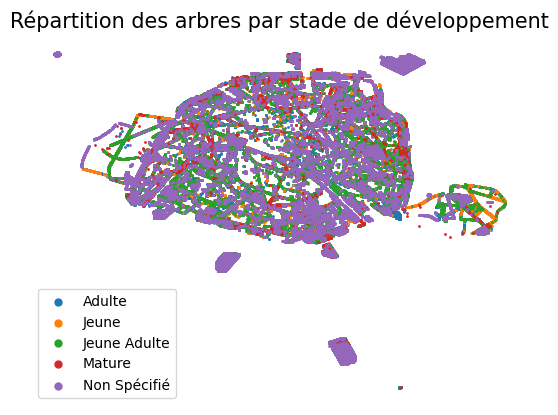

In [8]:
# Age des arbres

def plot_ages(trees_df):
    groups = trees_df.groupby('stade_developpement')
    for name, group in groups:
        plt.scatter(group.geo_point_2d_b, group.geo_point_2d_a, label=name, s=1)
    plt.title(("Répartition des arbres par stade de développement"), fontsize=15)
    plt.legend(loc = 'lower left', markerscale=5 )
    plt.axis('off')
    plt.show()

plot_ages(trees_df)


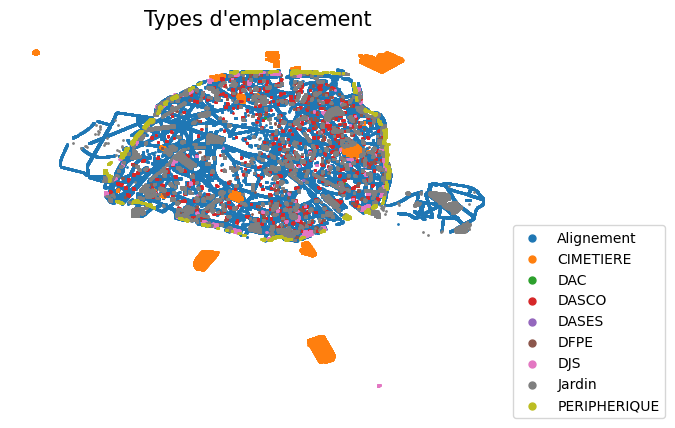

In [9]:
def plot_type_emplacement(df):
    groups = df.groupby('domanialite')
    for name, group in groups:
        plt.scatter(group.geo_point_2d_b, group.geo_point_2d_a, label=name, s=1)
    plt.title(("Types d'emplacement"), fontsize=15)
    plt.legend( markerscale=5, bbox_to_anchor=(1, 0.5))
    plt.axis('off')
    plt.show()

plot_type_emplacement(trees_df)


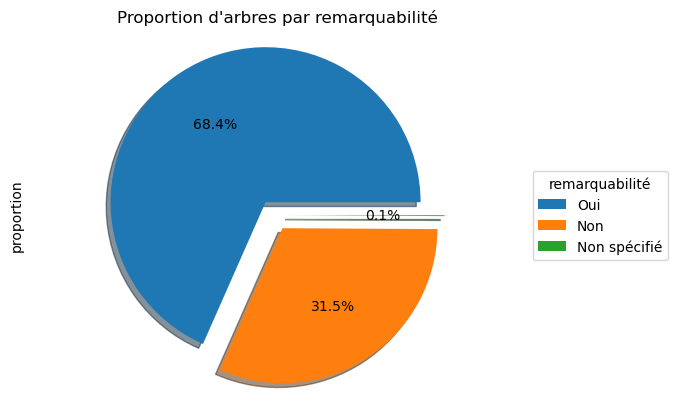

In [10]:
trees_df["remarquable"].fillna("Non spécifié", inplace = True)
trees_df["remarquable"].replace({0:"Non", 1:"Oui"}, inplace=True)
trees_df["remarquable"].value_counts(dropna=False)

column_info = {
    'name': "remarquable",
    'label': "remarquabilité",
    'categories': ["Oui", "Non", "Non spécifié"]
}

plot_pie_chart(trees_df, column_info)

In [11]:

def filter_remarkable_trees(trees_df):
    """Filter remarkable trees from the DataFrame."""
    remarkable_mask = trees_df["remarquable"] == "Oui"
    return trees_df[remarkable_mask]

def add_markers_to_map(map_obj, trees_df):
    """Add markers for each remarkable tree to the map."""
    for _, tree_row in trees_df.iterrows():
        folium.Marker(
            location=[tree_row["geo_point_2d_a"], tree_row["geo_point_2d_b"]],
            popup=tree_row["libelle_francais"],
            icon=folium.Icon(icon_color="white")
        ).add_to(map_obj)

def set_map_zoom(map_obj, trees_df):
    """Set the zoom level of the map to fit all markers."""
    southern_western_point = trees_df[["geo_point_2d_a", "geo_point_2d_b"]].min().values.tolist()
    northern_eastern_point = trees_df[["geo_point_2d_a", "geo_point_2d_b"]].max().values.tolist()
    map_obj.fit_bounds([southern_western_point, northern_eastern_point])

def display_map_with_remarkable_trees(trees_df):
    """Display a map with markers for remarkable trees."""
    # filter remarkable trees
    filtered_df = filter_remarkable_trees(trees_df)
    
    #print the count of remarkable trees
    print(f"Nous avons {filtered_df.shape[0]} arbres remarquables répartis comme suit")
    #create a folium map centered on Paris
    paris_map = folium.Map(location=[48.85, 2.35])

    # add the markers for remarkable trees
    add_markers_to_map(paris_map, filtered_df)
    set_map_zoom(paris_map, filtered_df)

    return paris_map

# display the map with remarkable trees
display_map_with_remarkable_trees(trees_df)


Nous avons 184 arbres remarquables répartis comme suit


# Nettoyage des variables quantitatives

In [12]:
qt_variables = ["circonference_cm","hauteur_m"]
round(trees_df[qt_variables].describe(), 3)

,circonference_cm,hauteur_m
count,200137.00,200137.000
mean,83.38,13.111
std,673.19,1971.217
min,0.00,0.000
25%,30.00,5.000
50%,70.00,8.000
75%,115.00,12.000
max,250255.00,881818.000


- la plus petite valeur pour les deux variables est de 0 => l'arbre n'existe pas
- pour la circonférence, la plus grande valeur est 250255.00 cm => 2,5km de circonférence !!!!
- pour la hauteur, la plus grande valeur est 881818.000 m => 882km de hauteur !!!!

Les représentations graphiques:

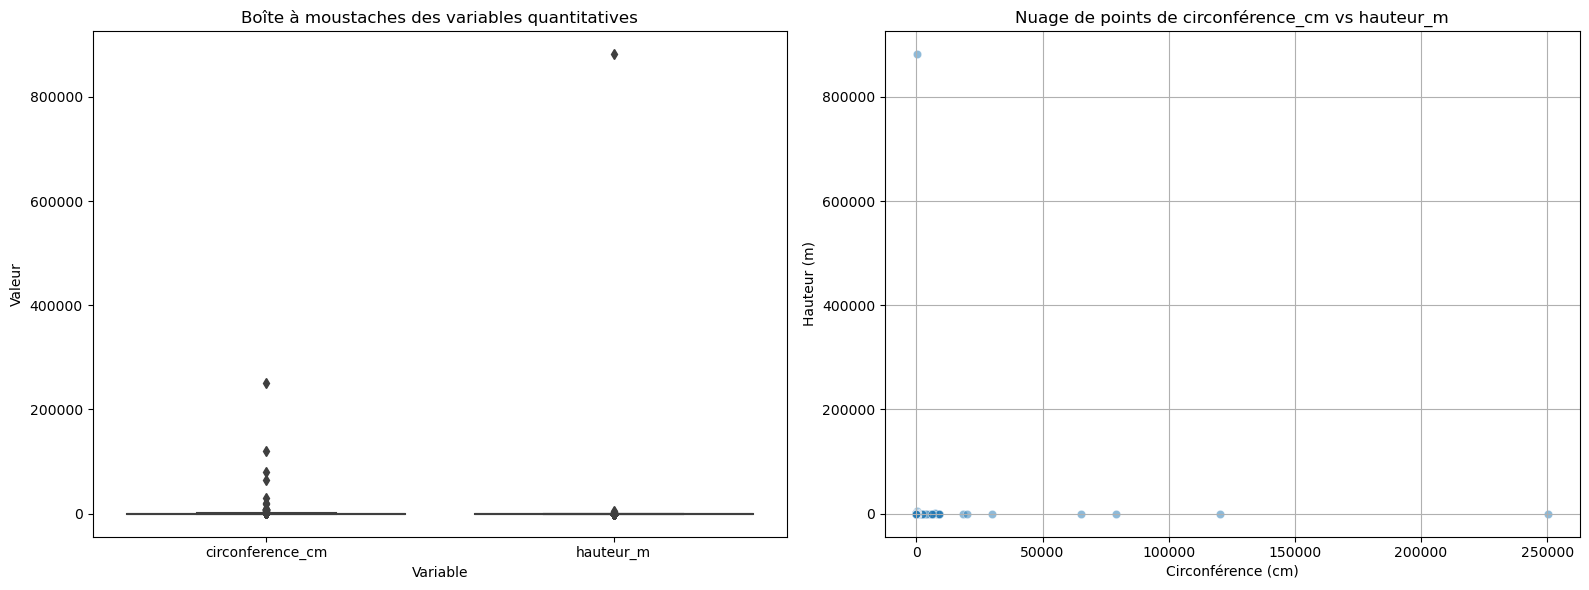

In [19]:
# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot boxplot of the 2 quantitative variables
sns.boxplot(data=trees_df[qt_variables], ax=axes[0])
axes[0].set_title('Boîte à moustaches (boxplot) des variables quantitatives')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Valeur')

# plot scatter plot between the 2 quantitative variables
sns.scatterplot(data=trees_df, x='circonference_cm', y='hauteur_m', alpha=0.5, ax=axes[1])
axes[1].set_title('Nuage de points de circonférence_cm vs hauteur_m')
axes[1].set_xlabel('Circonférence (cm)')
axes[1].set_ylabel('Hauteur (m)')
axes[1].grid(True)
plt.tight_layout()
plt.show()



 L'écart interquartile (IQR) est une mesure de dispersion qui représente la différence entre le troisième quartile (Q3) et le premier quartile (Q1). La borne inférieure (Limite Basse) est généralement définie comme étant égale à Q1 moins 1,5 fois l'IQR, et la borne supérieure (Limite Haute) est définie comme étant égale à Q3 plus 1,5 fois l'IQR. Ces bornes sont souvent utilisées dans l'analyse de données pour détecter les valeurs aberrantes (outliers) dans un ensemble de données.

In [31]:
def calculate_indicators(data, column_name):
    Q1 = round(data[column_name].quantile(0.25), 3)
    Q3 = round(data[column_name].quantile(0.75), 3)
    IQR = round(Q3 - Q1, 3)
    lower_bound = round(Q1 - (1.5 * IQR), 3)
    upper_bound = round(Q3 + (1.5 * IQR), 3)
    return Q1, Q3, IQR, lower_bound, upper_bound

def print_indicators(column_name, Q1, Q3, IQR, lower_bound, upper_bound):
    print(f"For the {column_name}:\n"
          + f"1st quartile: {Q1}\n"
          + f"3rd quartile: {Q3}\n"
          + f"IQR: {IQR}\n"
          + f"Lower bound: {lower_bound}\n"
          + f"Upper bound: {upper_bound}\n")

# Calculate indicators for circumference
Q1_circ, Q3_circ, IQR_circ, lower_bound_circ, upper_bound_circ = calculate_indicators(trees_df, "circonference_cm")
print_indicators("circumference", Q1_circ, Q3_circ, IQR_circ, lower_bound_circ, upper_bound_circ)

# Calculate indicators for height
Q1_htr, Q3_htr, IQR_htr, lower_bound_htr, upper_bound_htr = calculate_indicators(trees_df, "hauteur_m")
print()
print_indicators("height", Q1_htr, Q3_htr, IQR_htr, lower_bound_htr, upper_bound_htr)

# exclure les valeurs qui vont au dela des limites
print("After excluding outliers:")

# define conditions for filtering
circumference_condition = (trees_df["circonference_cm"] > 0) & (trees_df["circonference_cm"] <= upper_bound_circ)
height_condition = (trees_df["hauteur_m"] > 0) & (trees_df["hauteur_m"] <= upper_bound_htr)

# Apply filtering
trees_df_after_excl = trees_df[circumference_condition & height_condition]
round(trees_df_after_excl[qt_variables].describe(), 3)

For the circumference:
1st quartile: 30.0
3rd quartile: 115.0
IQR: 85.0
Lower bound: -97.5
Upper bound: 242.5


For the height:
1st quartile: 5.0
3rd quartile: 12.0
IQR: 7.0
Lower bound: -5.5
Upper bound: 22.5

After excluding outliers:


,circonference_cm,hauteur_m
count,154626.000,154626.000
mean,87.045,9.928
std,50.367,4.576
min,1.000,1.000
25%,45.000,6.000
50%,80.000,10.000
75%,120.000,13.000
max,242.000,22.000


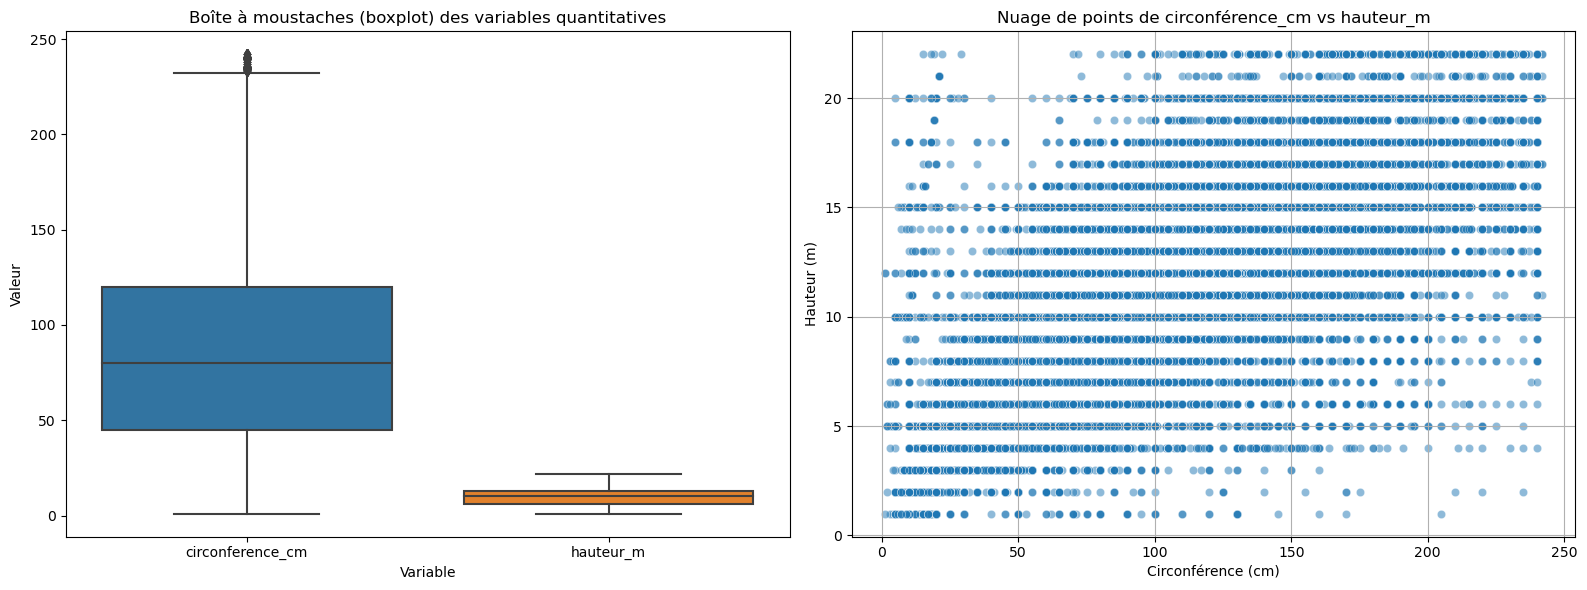

In [33]:
# create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# plot boxplot of the 2 quantitative variables after excl
sns.boxplot(data=trees_df_after_excl[qt_variables], ax=axes[0])
axes[0].set_title('Boîte à moustaches (boxplot) des variables quantitatives')
axes[0].set_xlabel('Variable')
axes[0].set_ylabel('Valeur')

# plot scatter plot between the 2 quantitative variables after excl
sns.scatterplot(data=trees_df_after_excl, x='circonference_cm', y='hauteur_m', alpha=0.5, ax=axes[1])
axes[1].set_title('Nuage de points de circonférence_cm vs hauteur_m')
axes[1].set_xlabel('Circonférence (cm)')
axes[1].set_ylabel('Hauteur (m)')
axes[1].grid(True)
plt.tight_layout()
plt.show()
